# Exploring the Variational Method
Today we are going to explore the Variational method using the particle in a box (PIB) system.  This worksheet was inspired by a similar worksheet written by W. Tandy Grubbs, Department of Chemistry, Unit 8271, Stetson University.

In order to focus on the variational method, rather than units, we will work in reduced units where most physical constants are equal to 1.  This is a common approach that is useful when investigating model problems.  To begin we will define the exact solutions to the PIB as $$ \psi_k(x)=\sqrt{2}\sin ( k\pi x) \\ E_k = \frac{k^2 \pi^2}{2} $$

Note that the energy expression is different than in class because we have defined hbar=1 (as well as m=1 and L=1).  I am using k as a quantum number rather than n because sympy uses N as a function.

In [1]:
# Make sure to run this cell
from sympy import *
import matplotlib.pyplot as plt
init_printing()

k1 = Symbol('k1')
x = Symbol('x')
def psi_exact(k): # define function to return the exact wavefunctions
    return (sqrt(2)*sin(k1*pi*x)).subs({k1:k})
# Define the energy of the first several states
E1=N(pi**2/2)
E2=N(4*pi**2/2)
E3=N(9*pi**2/2)

In [ ]:
# plot the functions
p = plot(psi_exact(1),psi_exact(2),psi_exact(3),(x,0,1),show=False)
p[0].line_color='red'
p[1].line_color='blue'
p[2].line_color='green'
p.show()

In [ ]:
print ("The first several energy levels are:\n",E1,E2,E3)

In order to test the variational principle, we need to create a test function that obeys the boundary conditions of the system.  We will initially work with $$\psi(x)=Mx(L-x)$$ where $M$ is a normalization constant.  We will prove that the energy given by $$ E = \frac{ \int \psi^* \widehat{H} \psi d \tau}{\int \psi^* \psi d \tau }$$ is greater than the exact ground state energy.

First, make a plot that compares the test function to the exact function. (Note, you will need to normalize the test function to compare it.)  Comment on your findings.

In [3]:
# Use this cell to define and normalize your trial function
M=Symbol('M',positive=True,real=True)
f = x*(1-x)
M = 1 /sqrt ( integrate(f**2,(x,0,1)))
f = M*f
f

In [5]:
# Use this cell to make your plot
p = plot(psi_exact(1),f,(x,0,1),show=False)
p[0].line_color='red'
p[1].line_color='blue'
p.show()

Now find the energy of the test function and compare it to the exact value.  Does it obey the variational principle?

In [6]:
# Use this cell to find the energy of your trial function

E = integrate(f*(-.5*diff(f,x,2)),(x,0,1)) / integrate(f**2,(x,0,1))
E

<font color='red'>Answer:</font> <b>(Put your answer here)</b>

Now let's consider the variational aspect.  Namely, let's define a test function that has a parameter that can be varied and see if we can get a better energy.  For our test function, we will use $$ f(x) = x(L-x)+Cx^2(L-x)^2 $$ where C is an adjustable parameter.  First, we must obtain an expression for the energy of the test function in terms of the parameter C.

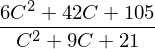

In [7]:
C = Symbol('C',real=True)
f = x*(1-x)+C*x**2*(1-x)**2
Etest = simplify ( integrate(-f*diff(f,x,2)/2,(x,0,1))/integrate(f*f,(x,0,1)) )
Etest

With this in hand, we want to minimize the energy, i.e. set $$ \frac{ d E(C)}{d C} = 0$$

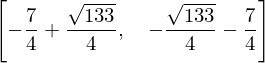

In [8]:
roots=solve(diff(Etest,C),C) # Assumes expression in parentheses equals 0
solve(diff(Etest,C),C)

Need to test both roots to see which is a minima.

In [9]:
for root in roots: # loop over the roots
    print(N(Etest.subs({C:root})))

4.93487481065841
51.0651251893416


We found it!  Now, let's redefine our wavefunction and compare the plot of each.

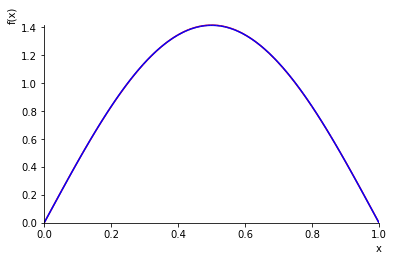

In [10]:
# Need to normalize
f=simplify(f.subs({C:roots[0]}))
M=1/sqrt(integrate(f*f,(x,0,1)))
f=simplify(M*f)
p = plot(psi_exact(1),f,(x,0,1),show=False)
p[0].line_color='red'
p[1].line_color='blue'
p.show()

Let's compare the energy!

In [11]:
Etest = N(Etest.subs({C:roots[0]}))
print ('The energy is: ',Etest,'\nThe percent error is: ', (Etest-E1)/E1*100)

The energy is:  4.93487481065841 
The percent error is:  0.00147138853349777


<font color='red'>This is very impressive!  It is only 0.00147% higher in energy than the exact solution.</font>

Now that you see how this approach works, try to find a variational solution for the first excited state using the following two functions: $$ \phi_1(x) = x(L-x)(\frac{L}{2}-x) \\ \phi_2(x)=x^2(L-x)^2(\frac{L}{2}-x)$$

You should again obtain a result that is quite good!  

<b>Note:  Make sure to enter "1/2" as "S(1)/2" otherwise python will plass 0.5 to sympy rather than a rational number.</b>